# Detección de genomas anómalos de SARS-CoV-2 por medio de algoritmos de aprendizaje no supervisados 

# Obtención del uso de codones del humano

En este Jupyter Notebook se obtiene, se pre-procesa y se visualiza el uso de codones del homo sapiens, obtenido de [aqui](https://www.kazusa.or.jp/codon/cgi-bin/showcodon.cgi?species=9606).

## ➤ Bibliotecas necesarias y configuración inicial

Las bibliotecas necesarias para obtener y visualizar el uso de codones del homo sapiens son ```pandas``` y ```matplotlib```.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

Configuración para el estilo a utilizar en las gráficas.

In [2]:
BACK = 'white'
FRONT = (230/255,236/255,245/255)

plt.rc('figure', facecolor=BACK, edgecolor='white')
plt.rc('axes', facecolor=FRONT, edgecolor='white', labelsize=14, 
       labelweight='medium', titlesize=18, grid=True, axisbelow=True)
plt.rc('grid', color='white')

## ➤ Obtención de los datos

Se lee el archivo y se muestra una parte.

In [3]:
# Se lee el archivo crudo con el uso de codones del humano
humanCodonsComplete = pd.read_csv('Archivos_crudos/homo_sapiens_codons.csv')

In [4]:
humanCodonsComplete.iloc[:,1:10]

,UUU frequency,UUU number,UUC frequency,UUC number,UUA frequency,UUA number,UUG frequency,UUG number,UCU frequency
0,17.6,714298,20.3,824692,7.7,311881,12.9,525688,15.2


## ➤ Pre-proecesamiento

Para el pre-procesamiento se seleccionan las columnas a utilizar (uso de codones absoluto), se le cambia el nombre a estas columnas y se obtiene la frecuencia relativa de cada una.

In [5]:
# Select columns to work with
columns = [column for column in humanCodonsComplete.columns if 'number' in column]
humanCodons = humanCodonsComplete[columns + ['Name','Codons']].set_index('Name')
# Function to enumerate the codons
base_to_number = {'A':'0','C':'1','G':'2','T':'3','U':'3'}
codon_to_int = lambda codon: int(''.join([base_to_number[base] for base in codon]), base=4)
# Rename codons name by number
humanCodons = humanCodons.rename(columns={column: str(codon_to_int(column.split(' ')[0])) 
                                          for column in columns if column != 'Codons'})
# Get the total of codons
total_humanCodons = humanCodons['Codons'].iloc[0]
humanCodons = humanCodons.drop(columns=['Codons'])
# Sort the columns
humanCodons = humanCodons[sorted([column for column in humanCodons.columns], key=int)]
# Get the frequency of each codon
humanCodons = humanCodons/total_humanCodons
# Transform the dataframe to a pandas series
humanCodons = humanCodons.T.squeeze()
humanCodons

0     0.024436
1     0.019099
2     0.031861
3     0.016962
4     0.015113
        ...   
59    0.010582
60    0.007670
61    0.020281
62    0.012928
63    0.017566
Name: Homo_sapiens, Length: 64, dtype: float64

## ➤ Visualización del uso de codones

Se obtiene el histograma de la frecuencia relativa del uso de codones del humano.

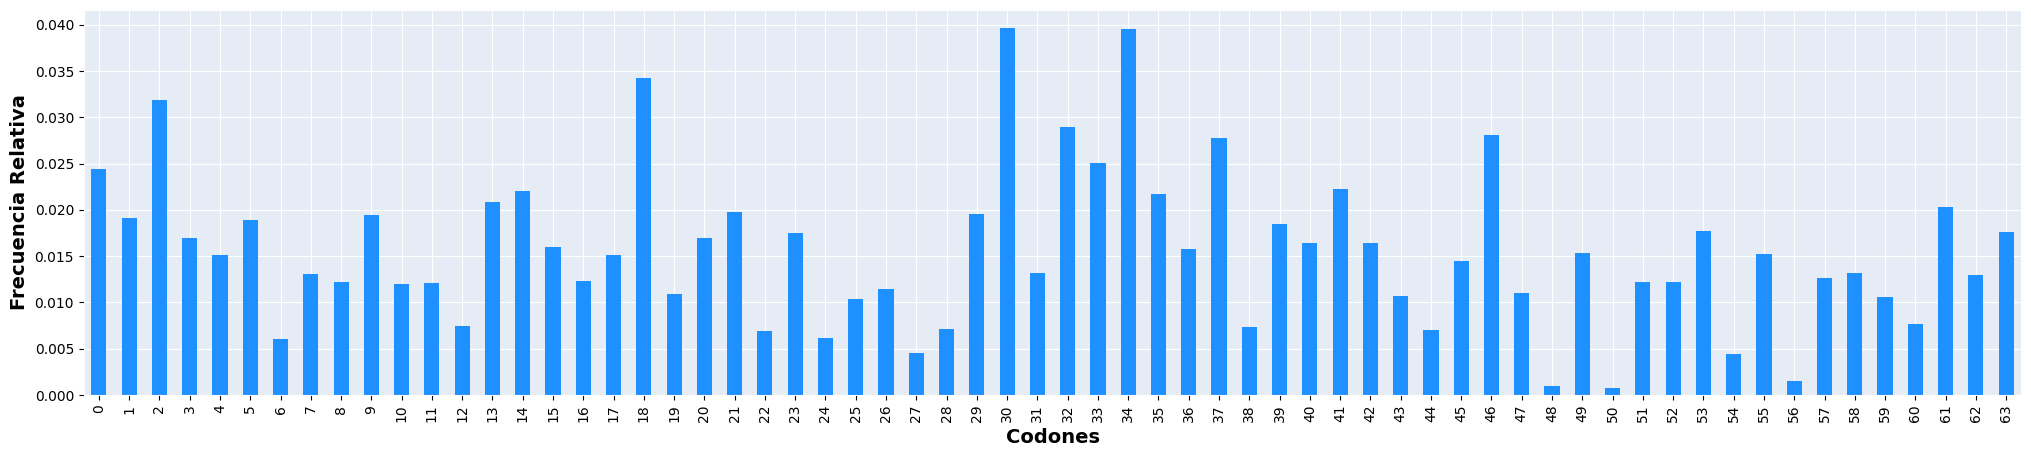

In [6]:
fig, ax = plt.subplots(figsize=(25,5))
humanCodons.plot(kind='bar', color='dodgerblue', ax=ax, grid=True);
#ax.set_title('Uso de codones (Homo sapiens)', fontdict=dict(size=16, weight='bold'));
ax.set_xlabel('Codones', fontdict=dict(size=14, weight='bold'));
ax.set_ylabel('Frecuencia Relativa', fontdict=dict(size=14, weight='bold'));
fig.savefig('Images/codon_usage_human.pdf', dpi=1000, bbox_inches='tight', facecolor='none')
fig.savefig('Images(jpg)/codon_usage_human.jpg', dpi=1000, bbox_inches='tight', facecolor='none')

## ➤ Se guarda el archivo generado

In [7]:
humanCodons.to_csv('Archivos/human_codon_usage.csv', index=False)